In [2]:
import pandas as pd
import numpy as np

In [3]:
#read data
path = '/content/drive/MyDrive/TUGAS AKHIR/DATASET/heart FAILURE.csv'

load_data_cc = pd.read_csv(path)

In [4]:
#Membentuk data frame
df = pd.DataFrame(load_data_cc)

#View the data
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

##Data Preprocessing

In [8]:
new_df = df

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(new_df['Sex'])

LabelEncoder()

In [10]:
le.classes_

array(['F', 'M'], dtype=object)

In [11]:
new_df['Encoder_sex']=le.transform(new_df['Sex'])

In [12]:
new_df=new_df.drop('Sex',axis=1)

In [13]:
print(df['ST_Slope'].value_counts())

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [14]:
le.fit(new_df['ST_Slope'])
le.classes_

array(['Down', 'Flat', 'Up'], dtype=object)

In [15]:
new_df['Encoder_ST_Slope']=le.transform(new_df['ST_Slope'])

In [16]:
new_df=new_df.drop('ST_Slope',axis=1)

In [17]:
print(df['ExerciseAngina'].value_counts())

N    547
Y    371
Name: ExerciseAngina, dtype: int64


In [18]:
le.fit(new_df['ExerciseAngina'])
le.classes_

array(['N', 'Y'], dtype=object)

In [19]:
new_df['Encoder_ExerciseAngina']=le.transform(new_df['ExerciseAngina'])

In [20]:
new_df=new_df.drop('ExerciseAngina',axis=1)

In [21]:
new_df

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,HeartDisease,Encoder_sex,Encoder_ST_Slope,Encoder_ExerciseAngina
0,40,ATA,140,289,0,Normal,172,0.0,0,1,2,0
1,49,NAP,160,180,0,Normal,156,1.0,1,0,1,0
2,37,ATA,130,283,0,ST,98,0.0,0,1,2,0
3,48,ASY,138,214,0,Normal,108,1.5,1,0,1,1
4,54,NAP,150,195,0,Normal,122,0.0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,1.2,1,1,1,0
914,68,ASY,144,193,1,Normal,141,3.4,1,1,1,0
915,57,ASY,130,131,0,Normal,115,1.2,1,1,1,1
916,57,ATA,130,236,0,LVH,174,0.0,1,0,1,0


In [22]:
print(df['RestingECG'].value_counts())

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


In [23]:
le.fit(new_df['RestingECG'])
le.classes_

array(['LVH', 'Normal', 'ST'], dtype=object)

In [24]:
new_df['Encoder_RestingECG']=le.transform(new_df['RestingECG'])

In [25]:
new_df=new_df.drop('RestingECG',axis=1)

In [26]:
new_df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Encoder_sex,Encoder_ST_Slope,Encoder_ExerciseAngina,Encoder_RestingECG
0,40,ATA,140,289,0,172,0.0,0,1,2,0,1
1,49,NAP,160,180,0,156,1.0,1,0,1,0,1
2,37,ATA,130,283,0,98,0.0,0,1,2,0,2
3,48,ASY,138,214,0,108,1.5,1,0,1,1,1
4,54,NAP,150,195,0,122,0.0,0,1,2,0,1


In [27]:
print(df['ChestPainType'].value_counts())

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


In [28]:
le.fit(new_df['ChestPainType'])
le.classes_

array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object)

In [29]:
new_df['Encoder_ChestPainType']=le.transform(new_df['ChestPainType'])

In [30]:
new_df=new_df.drop('ChestPainType',axis=1)

In [31]:
new_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Encoder_sex,Encoder_ST_Slope,Encoder_ExerciseAngina,Encoder_RestingECG,Encoder_ChestPainType
0,40,140,289,0,172,0.0,0,1,2,0,1,1
1,49,160,180,0,156,1.0,1,0,1,0,1,2
2,37,130,283,0,98,0.0,0,1,2,0,2,1
3,48,138,214,0,108,1.5,1,0,1,1,1,0
4,54,150,195,0,122,0.0,0,1,2,0,1,2


In [32]:
new_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Encoder_sex,Encoder_ST_Slope,Encoder_ExerciseAngina,Encoder_RestingECG,Encoder_ChestPainType
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.789760,1.361656,0.404139,0.989107,0.781046
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.607056,0.490992,0.631671,0.956519
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000


In [33]:
new_df.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Encoder_sex,Encoder_ST_Slope,Encoder_ExerciseAngina,Encoder_RestingECG,Encoder_ChestPainType
0,40,140,289,0,172,0.0,0,1,2,0,1,1
1,49,160,180,0,156,1.0,1,0,1,0,1,2
2,37,130,283,0,98,0.0,0,1,2,0,2,1
3,48,138,214,0,108,1.5,1,0,1,1,1,0
4,54,150,195,0,122,0.0,0,1,2,0,1,2
5,39,120,339,0,170,0.0,0,1,2,0,1,2
6,45,130,237,0,170,0.0,0,0,2,0,1,1
7,54,110,208,0,142,0.0,0,1,2,0,1,1
8,37,140,207,0,130,1.5,1,1,1,1,1,0
9,48,120,284,0,120,0.0,0,0,2,0,1,1


In [34]:
new_df.shape

(918, 12)

In [35]:
new_df.nunique()

Age                        50
RestingBP                  67
Cholesterol               222
FastingBS                   2
MaxHR                     119
Oldpeak                    53
HeartDisease                2
Encoder_sex                 2
Encoder_ST_Slope            3
Encoder_ExerciseAngina      2
Encoder_RestingECG          3
Encoder_ChestPainType       4
dtype: int64

##Random Forest Model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [37]:
X = new_df.drop('HeartDisease', axis = 1)
y = new_df['HeartDisease']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [40]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = rf_classifier.predict(X_test)

In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


In [43]:
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [44]:
# Get feature importances
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

In [45]:
print(feature_importances)

                        importance
Encoder_ST_Slope          0.244399
Oldpeak                   0.116492
Encoder_ChestPainType     0.110999
MaxHR                     0.104616
Cholesterol               0.103257
Encoder_ExerciseAngina    0.088751
Age                       0.086883
RestingBP                 0.063899
Encoder_sex               0.033689
Encoder_RestingECG        0.025160
FastingBS                 0.021854


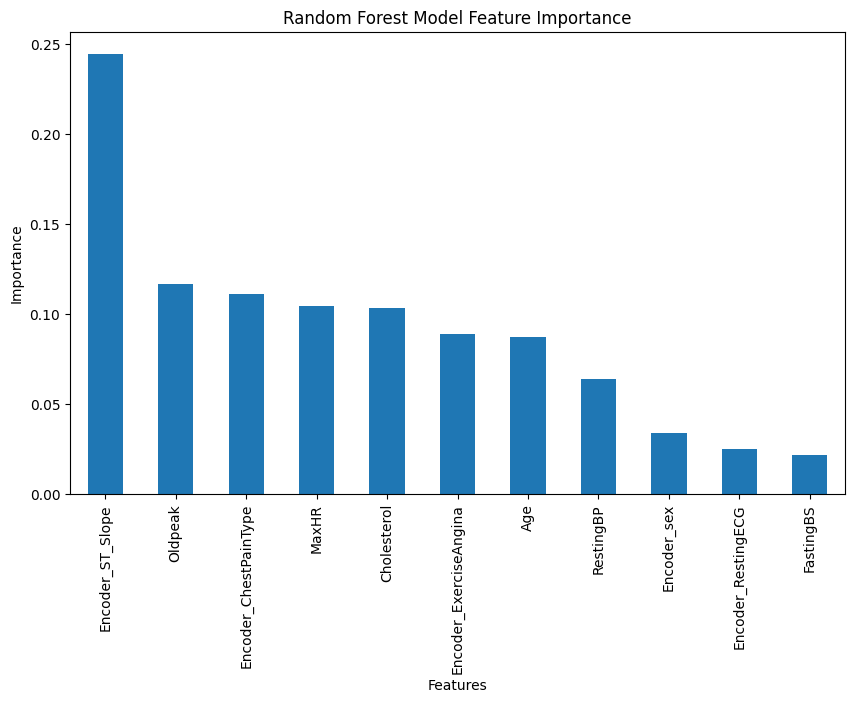

In [46]:
# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importances['importance'].plot(kind='bar')
plt.title('Random Forest Model Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

##Decision Tree Model

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [49]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
y_pred = dt_classifier.predict(X_test)

In [51]:
# Display classification report
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78        77
           1       0.87      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184



In [52]:
# Get feature importances
feature_importances = pd.DataFrame(dt_classifier.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

In [53]:
print(feature_importances)

                        importance
Encoder_ST_Slope          0.404613
MaxHR                     0.114620
Cholesterol               0.105633
Age                       0.091630
Oldpeak                   0.070219
Encoder_ChestPainType     0.058537
RestingBP                 0.042749
Encoder_sex               0.035152
Encoder_ExerciseAngina    0.030485
FastingBS                 0.026228
Encoder_RestingECG        0.020135


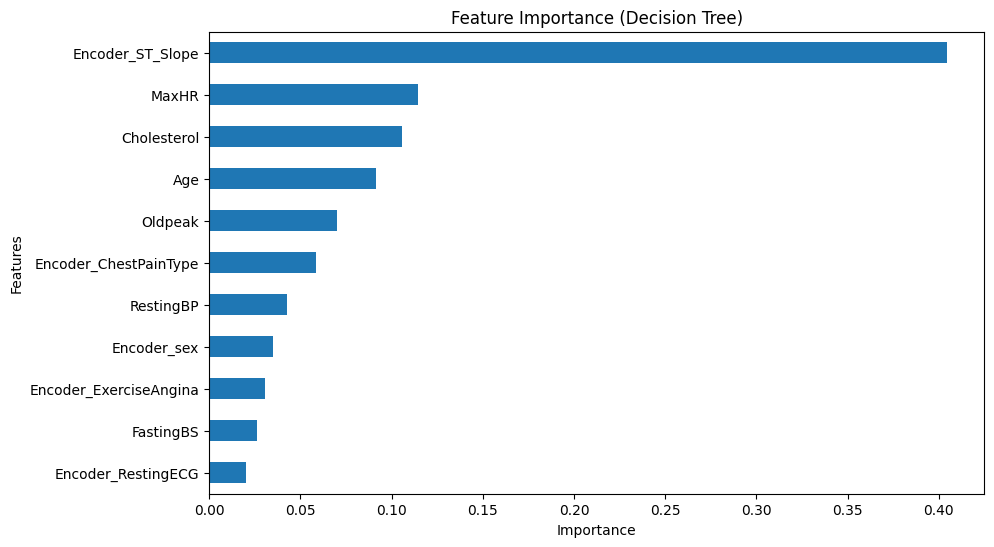

In [54]:
# Plot feature importance (for Decision Tree)
plt.figure(figsize=(10, 6))
pd.Series(dt_classifier.feature_importances_, index=X_train.columns).sort_values().plot(kind='barh')
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

##XGBOOST MODEL

In [55]:
from xgboost import XGBClassifier

In [56]:
xgb_classifier = XGBClassifier()

In [57]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
y_pred = xgb_classifier.predict(X_test)

In [59]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        77
           1       0.92      0.85      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [60]:
feature_importances = pd.DataFrame(xgb_classifier.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

In [61]:
print(feature_importances)

                        importance
Encoder_ST_Slope          0.504496
Encoder_ChestPainType     0.093764
Encoder_ExerciseAngina    0.088561
Encoder_sex               0.082456
FastingBS                 0.058434
Oldpeak                   0.039754
Cholesterol               0.031521
Encoder_RestingECG        0.028567
RestingBP                 0.024951
MaxHR                     0.023964
Age                       0.023531


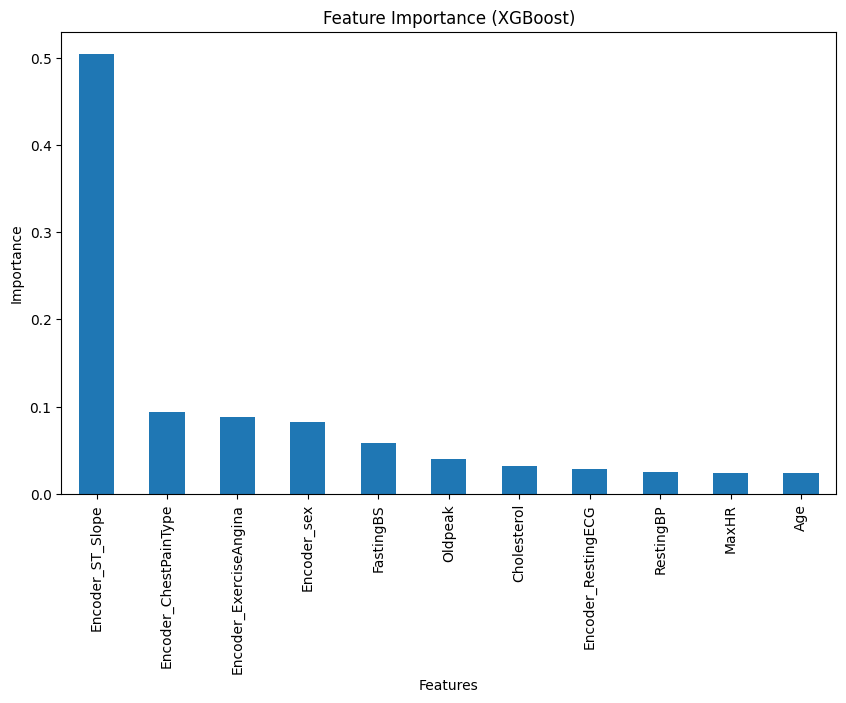

In [62]:
# Plot feature importance (for XGBoost)
plt.figure(figsize=(10, 6))
feature_importances['importance'].plot(kind='bar')
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()